In [1]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/../../..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)

from libs.common import *
from config.config import *

c:\Users\Admin\Data\ads_fraud_detection


c:/Users/Admin/Data/ads_fraud_detection


# 3. Tiền xử lí dữ liệu

In [2]:
save_dir=f"{exps_dir}/exp1/exp_gan"

save_dir = f"{save_dir}"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42

In [3]:
test_size=0.33
seed=42
data=pd.read_excel(f'{exps_dir}/exp1/data_EDA.xlsx')
data

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day_policy_bind_date,month_policy_bind_date,year_policy_bind_date,day_incident_date,month_incident_date,year_incident_date
0,Y,Middle,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,Morning,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2002-2008,Y,17,10,2014,25,1,2015
1,Y,Middle,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,Morning,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2002-2008,Y,27,6,2006,21,1,2015
2,Y,Young,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,Morning,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2002-2008,N,6,9,2000,22,2,2015
3,Y,Middle,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,Morning,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2018++,Y,25,5,1990,10,1,2015
4,Y,Middle,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,Night,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2018++,N,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,N,Middle,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,Night,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2002-2008,N,16,7,1991,22,2,2015
996,Y,Middle,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,Night,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2018++,N,5,1,2014,24,1,2015
997,Y,Young,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,Morning,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1995-20001,N,17,2,2003,23,1,2015
998,Y,Old,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,Morning,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1995-20001,N,18,11,2011,26,2,2015


In [4]:
data.isnull().sum()

months_as_customer              4
age                             2
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_hour_of_the_day       52
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses                       0
police_report_available         0
total_claim_amount              0
injury_claim                    0
property_claim                  0
vehicle_claim 

# 4.Chuẩn hóa dữ liệu

In [5]:
numeric_columns=dict(np.load(f'{exps_dir}/exp1/columns_dtype.npz',allow_pickle=True))['numeric_columns']
numeric_columns

array(['policy_annual_premium', 'capital-gains', 'capital-loss',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'day_policy_bind_date', 'month_policy_bind_date',
       'year_policy_bind_date', 'day_incident_date',
       'month_incident_date', 'year_incident_date'], dtype='<U22')

In [6]:
category_columns=dict(np.load(f'{exps_dir}/exp1/columns_dtype.npz',allow_pickle=True))['category_columns']
category_columns

array(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'auto_make', 'auto_model', 'auto_year', 'fraud_reported'],
      dtype='<U27')

In [7]:
data_train, data_test = train_test_split(data, test_size = 0.33, random_state=seed)
print(data_train.shape,data_test.shape)
# data_train.to_excel(f'{save_dir}/datatrain.xlsx', index=None)
# data_test.to_excel(f'{save_dir}/datatest.xlsx', index=None)

(670, 40) (330, 40)


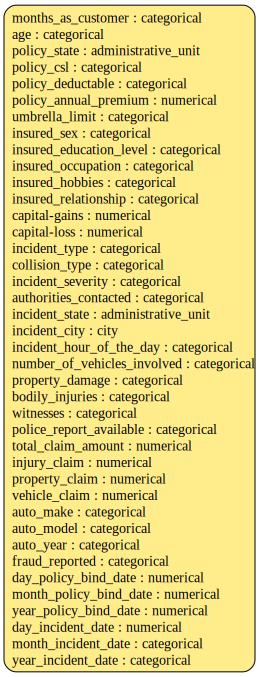

In [8]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=data_train)
metadata.visualize()

In [9]:
from sdv.single_table import CTGANSynthesizer
model = CTGANSynthesizer(
    cuda=True, metadata=metadata, epochs=100)
#     anonymize_fields={
#    'address': 'address',
#    'city': 'incident_city',

#     }

model.fit(data)

In [10]:
new_data = model.sample(num_rows=1500)

In [11]:
new_data.fraud_reported.value_counts()

fraud_reported
N    1041
Y     459
Name: count, dtype: int64

In [12]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=data_train,
    synthetic_data=new_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 40/40 [00:00<00:00, 2038.92it/s]|
Data Validity Score: 99.94%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 250.92it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 99.97%



In [13]:
from sdv.evaluation.single_table import evaluate_quality

quality_report=evaluate_quality(real_data=data_train,
    synthetic_data=new_data,
    metadata=metadata)


Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 40/40 [00:00<00:00, 545.91it/s]|
Column Shapes Score: 84.11%

(2/2) Evaluating Column Pair Trends: |██████████| 780/780 [00:03<00:00, 213.99it/s]|
Column Pair Trends Score: 74.89%

Overall Score (Average): 79.5%



In [14]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,months_as_customer,TVComplement,0.992000
1,age,TVComplement,0.839404
2,policy_csl,TVComplement,0.960229
3,policy_deductable,TVComplement,0.943124
4,policy_annual_premium,KSComplement,0.499741
5,umbrella_limit,TVComplement,0.957562
6,insured_sex,TVComplement,0.883960
7,insured_education_level,TVComplement,0.922527
8,insured_occupation,TVComplement,0.920925
9,insured_hobbies,TVComplement,0.942886


In [15]:
data_train.fraud_reported.value_counts()

fraud_reported
N    511
Y    159
Name: count, dtype: int64

In [16]:
from sklearn.utils import shuffle
gan_data_fraud=new_data[new_data.fraud_reported=="Y"]
data_train=pd.concat([data_train, gan_data_fraud] , axis=0, ignore_index=True)

# data_train=pd.concat([data_train, gan_data_fraud] , axis=0, ignore_index=True)
data_train = shuffle(data_train, random_state=42)
data_train.fraud_reported.value_counts()



fraud_reported
Y    618
N    511
Name: count, dtype: int64

In [17]:
data_train.fraud_reported.tail

<bound method NDFrame.tail of 743     Y
1010    Y
1123    Y
140     N
554     Y
       ..
121     N
1044    Y
1095    Y
860     Y
1126    Y
Name: fraud_reported, Length: 1129, dtype: object>

In [18]:
x_train=data_train.drop('fraud_reported',axis=1)
y_train=data_train['fraud_reported']

# x_test=data_test.drop('fraud_reported',axis=1)
# y_test=data_test['fraud_reported']

In [19]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
# np.savez(f'{save_dir}/class_weights_dict.npz', class_weights_dict = class_weights_dict)
class_weights_dict

{0: 1.1046966731898238, 1: 0.9134304207119741}

In [20]:
y_train.value_counts()

fraud_reported
Y    618
N    511
Name: count, dtype: int64

In [21]:
x_test=data_test.drop('fraud_reported',axis=1)
y_test=data_test['fraud_reported']

In [22]:
label_encoders = {}
for column in category_columns:
    if column=="fraud_reported":
        continue
    label_encoder = LabelEncoder()
    x_train[column] = label_encoder.fit_transform(x_train[column])
    label_encoders[column] = label_encoder  # Lưu trữ label encoder nếu cần sau này

scaler = StandardScaler()
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])
x_train

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,day_policy_bind_date,month_policy_bind_date,year_policy_bind_date,day_incident_date,month_incident_date,year_incident_date
743,0,2,44,0,0,0.778857,0,0,4,3,0,2,-0.733661,0.621567,2,1,3,3,18,374,0,0,2,2,1,2,-0.795571,1.740803,-0.770350,-0.260527,2,13,2,0.744434,0.927272,-1.003667,-0.200946,0.971703,0.0
1010,0,0,31,0,0,0.597927,0,0,3,8,7,5,-0.596753,-1.278128,0,3,0,3,53,230,0,0,0,0,1,2,-0.221076,1.409095,1.059853,1.113388,3,5,1,1.173408,-1.037928,-1.136774,-1.199873,-0.936214,0.0
1123,1,2,22,0,0,0.764982,0,0,4,6,16,4,1.994466,0.688464,2,0,0,3,9,183,1,0,0,0,2,1,-0.436461,-0.547068,-1.401345,0.618594,11,14,2,1.173408,-1.037928,-0.071918,-1.199873,0.971703,0.0
140,1,0,36,1,0,-1.379387,0,0,1,3,6,4,-0.790190,0.821962,3,0,3,4,26,400,1,0,1,2,3,1,-1.726261,-1.352302,-1.347614,-2.066499,5,13,0,0.958921,1.208015,-0.071918,0.797982,-0.936214,0.0
554,0,2,12,2,0,-3.002462,0,0,1,0,13,5,-0.107431,-1.168893,0,1,0,1,43,13,1,2,0,0,2,2,0.763750,1.189048,0.884292,-0.224577,13,28,2,0.529948,0.085043,0.593617,1.352942,-0.936214,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1,0,11,1,2,-0.365876,0,0,6,1,11,3,-0.790190,-0.684277,2,2,0,0,52,128,2,0,0,0,2,2,-0.167259,0.262537,0.049787,-0.918336,3,25,1,0.529948,0.927272,0.327403,0.797982,-0.936214,0.0
1044,1,2,21,1,0,0.549318,0,1,1,0,0,3,-0.760842,0.670651,3,0,1,0,38,442,1,2,1,0,1,0,0.144142,-0.448735,1.358227,1.131434,10,10,1,-0.327999,0.646529,-1.136774,1.241950,0.971703,0.0
1095,0,0,33,2,0,0.909480,0,0,3,1,13,0,1.344712,0.742328,2,2,0,4,41,165,2,0,1,2,2,1,0.180672,-1.415672,-1.138791,0.739207,9,25,2,1.280651,0.365786,0.194296,-1.199873,0.971703,0.0
860,1,0,21,1,0,0.220331,0,1,0,1,3,0,-0.672050,0.681522,2,3,2,1,32,110,0,0,0,2,0,0,0.522055,0.738029,-1.102577,1.502576,12,30,0,0.315461,0.646529,-1.136774,-1.199873,0.971703,0.0


In [23]:
x_train.to_excel(f'{save_dir}/x_train.xlsx', index=False)
y_train.to_excel(f'{save_dir}/y_train.xlsx', index=False)

In [24]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
np.savez(f'{save_dir}/class_weights_dict.npz', class_weights_dict = class_weights_dict)
class_weights_dict


{0: 1.1046966731898238, 1: 0.9134304207119741}

In [25]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
print(f"+ X_train: {len(x_train)}")
for fold, (train_idx, valid_idx) in enumerate(kfold.split(x_train, y_train)):
    print(f'Fold {fold}: ')
    print(f'+ train_idx: {train_idx}')
    print(f'+ valid_idx: {valid_idx}')
    print(f'+ train / valid: {valid_idx}')
    pass

+ X_train: 1129
Fold 0: 
+ train_idx: [   0    1    2    4    5    6    7    8    9   11   13   14   15   16
   17   18   19   20   21   22   24   25   26   27   28   29   32   33
   34   35   36   37   38   40   41   42   43   45   46   47   48   50
   52   53   55   57   60   61   62   64   65   68   69   71   72   73
   74   75   77   79   80   81   82   84   85   87   89   90   91   92
   93   94   95   97   98   99  102  103  104  105  106  108  110  111
  112  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  129  130  131  132  133  134  135  137  142  143  144  145  146
  147  148  149  150  151  152  153  154  155  157  159  160  161  162
  163  164  165  166  167  169  170  171  172  173  175  176  177  179
  180  181  182  183  184  185  186  187  188  189  190  191  193  194
  195  196  197  200  201  202  203  204  205  206  207  211  212  213
  214  215  216  217  219  221  222  223  224  225  226  227  228  229
  230  232  233  234  235  236  237  23

In [26]:
object_cols_test=dict(np.load(f'{exps_dir}/exp1/columns_dtype.npz',allow_pickle=True))['category_columns']
numeric_cols_test=dict(np.load(f'{exps_dir}/exp1/columns_dtype.npz',allow_pickle=True))['numeric_columns']
# for column in outliers_list:
#     data_test = remove_outliers_iqr(data_test, column)
# data_test['collision_type'].replace('?',np.nan,inplace=True)
# data_test['collision_type'].fillna(method='ffill',inplace=True)
# data_test[['property_damage','police_report_available']].replace('?','Unknow',inplace=True)
# (data_test=='?').sum()
label_encoders = {}
for column in object_cols_test:
    if column=="fraud_reported":
        continue
    label_encoder = LabelEncoder()
    x_test[column] = label_encoder.fit_transform(x_test[column])
    label_encoders[column] = label_encoder  # Lưu trữ label encoder nếu cần sau này

scaler = StandardScaler()
x_test[numeric_cols_test] = scaler.fit_transform(x_test[numeric_cols_test])

x_test=data_test.drop('fraud_reported',axis=1)
y_test=data_test['fraud_reported']
data_test.to_excel(f'{save_dir}/df_test_minmax.xlsx', index=False)
x_test.to_excel(f'{save_dir}/x_test.xlsx', index=False)
y_test.to_excel(f'{save_dir}/y_test.xlsx', index=False)